# Using Correlation Analysis on Breast Cancer Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# makes the random numbers predictable and is used for reproducibility
np.random.seed(123)

In [2]:
data = pd.read_csv('breast_cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Making the correlations

# documentation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# pearson is default for Pandas correlation
corr = data.corr()
corr.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN


<Axes: >

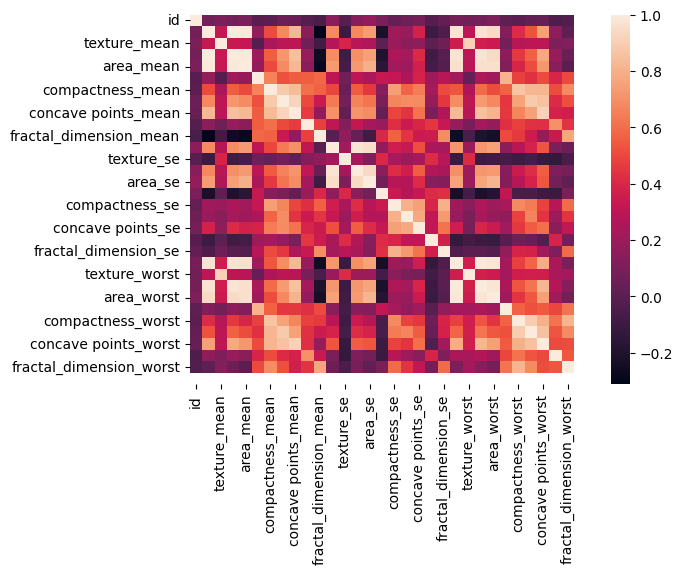

In [5]:
# heatmap
sns.heatmap(corr)

<Axes: >

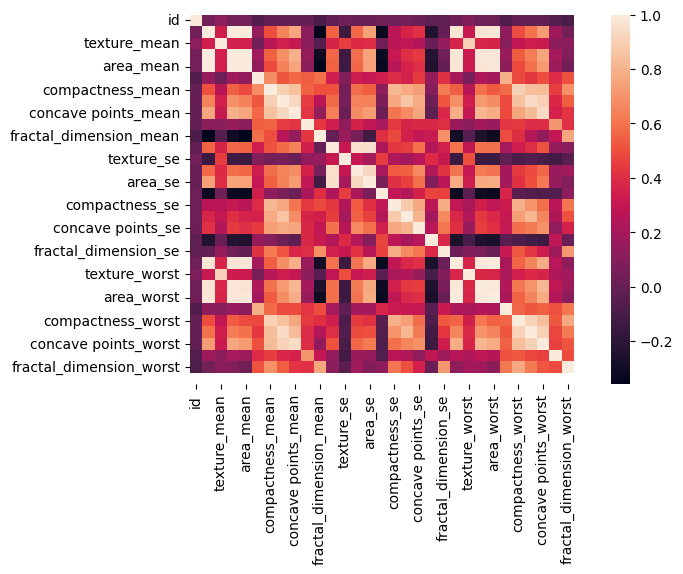

In [6]:
# Let's do that again with Spearmann

corr = data.corr(method = "spearman")
sns.heatmap(corr)

# Regression Analysis

In [ ]:
numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 
                     'smoothness_mean']

dependent_var = 'area_mean'

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, independent_var in enumerate(numerical_columns):
    sns.regplot(x = data[independent_var],  # regplot does regression plot
                    y = data[dependent_var], ax=axs[int(i/2) - 1, i%2])    
    
plt.show()

# Coefficient of Determination

The R^2 Formula

R^2 = 1 - { ∑((Est (y_predicted - y_seen)2}/ ∑ (y_seen –y_seen_average)2

R^2 = percentage of total variation not accounted for by best fit line, divided by the total variation SEEN

R^2: 
1 = perfect correlation
0: NO correlation at all.


Denominator: Total variation in y
    - sum squared error from the mean of the ys (for each seen y)
Numerator: sum squared error from seen y to predicted y.
 
As R2 increases, the explanatory power of the linear correlation is higher.


In [ ]:
# we are going to use sklearn r2 implementation.  
# I am sure there are plenty of other libraries that can be used too.

## Documentation: 
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score


In [ ]:
from sklearn.linear_model import LinearRegression
for i, independent_var in enumerate(numerical_columns):
    # Make the regression model
    model = LinearRegression()
    y_data = data[dependent_var]
    x_data = data[independent_var][:, None] # this is a shaping thing
    
    model.fit(x_data, y_data)
    
    # get model predictions on x_data
    predicted_y = model.predict(x_data)
    
    # get correlation of determinate
    r2 = r2_score(y_data, predicted_y)
    
    print(f"The coefficient of determination between {independent_var} and {dependent_var} is: {r2}")